In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
colormap2 = plt.cm.viridis
colorst2 = [colormap2(i) for i in np.linspace(0.,1,10)] 

In [3]:
bins = 25
m_cdm_a = np.logspace(6,11,30)


def func4(halo_mass,alpha,gamma,amp):
    beta = 1.00
    return amp*((1+(alpha*(1e9/halo_mass))**beta)**gamma)+ (1-amp)

def plot_maker_thermal(ax, mwdm, bins=25,f_wdm = np.arange(0.1,1.1,0.1),legend=False, Lovell=False):
    
    for i in range(len(f_wdm)):
        a0, a1,b0,b1,b2, c0,c1= [29.5, -3.1,-0.980, -0.096, -0.203,  1.358,  0.80]
        param0 = a0 * mwdm ** a1
        param1 = np.poly1d([b0,b1,b2])(f_wdm[i])
        delta0 = -1 / (1 + np.exp(-c0 * (mwdm  - c1)))
        param2 = np.poly1d([delta0,1-delta0,0])(f_wdm[i])
       # print(param0,param1,param2)
        ax.plot(m_cdm_a,func4(m_cdm_a,param0,param1,param2),label='$f_{wdm}$ = %s'%(round(f_wdm[i],2)),color=colorst2[i]) 
 
    if Lovell:
        ax.plot(m_cdm_a, suppression_Lovell(mwdm,m_cdm_a),linestyle='dashdot',color='r',label='Lowell 2014')
    
    ax.text(41000000000, 0.025, str(int(mwdm))+ ' keV', fontsize=16,
            verticalalignment='bottom', horizontalalignment='right',
            bbox = dict(boxstyle='square', facecolor='white'), zorder=3000000 )
    ax.hlines(1,1e6,2e11,color='grey',linestyle='dashed', label='CDM',zorder=100)
    ax.set_xscale('log')
    ax.set_xlim(1e7,5e10)
    ax.set_ylim(0,1.05)
   # ax.set_title(r'm$_{\rm wdm}=%s$ keV'%mwdm,fontsize=20)
    
    ax.set_xlabel(r"$M (M_\odot)$",fontsize=20)
   # ax.set_ylabel(r"$\beta(m_{\rm WDM},f_{\rm WDM})$",fontsize=20)

    handles, labels = ax.get_legend_handles_labels()
    handles = [handles[-1]] + handles[:-1]
    labels = [labels[-1]] + labels[:-1]

    if legend:
        ax.legend(handles, labels, fontsize=13.5, loc='center right')
        

Text(0.5, 1.0, 'Mixed Thermal Relic WDM')

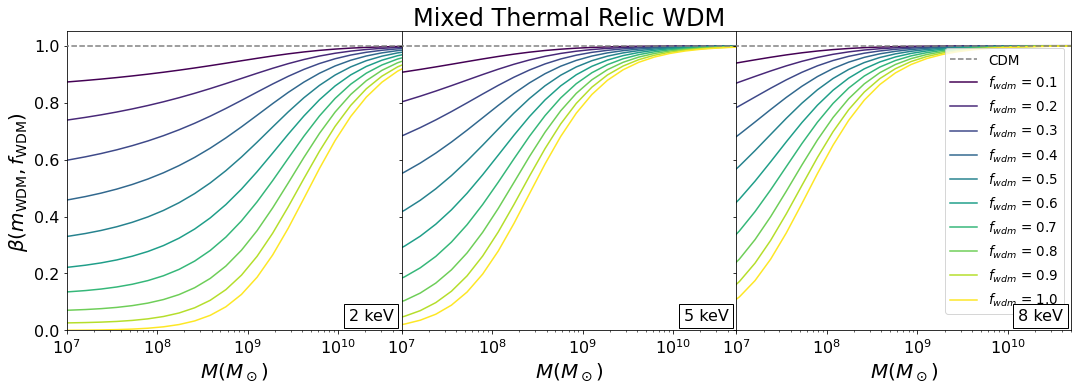

In [4]:
fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(18, 5.5), sharey=True)

plot_maker_thermal(ax1, 2)
plot_maker_thermal(ax2, 5)
plot_maker_thermal(ax3, 8.,legend=True)
ax1.set_ylabel(r"$\beta(m_{\rm WDM},f_{\rm WDM})$",fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax3.tick_params(labelsize=16)
ax2.set_title('Mixed Thermal Relic WDM', fontsize =24)
#plt.tight_layout()
#plt.savefig('plots/Fig2.pdf', bbox_inches='tight')




In [5]:
sterile_nu = pd.read_csv('sterile_nu_fits.csv')
colormap2 = plt.cm.cividis
colorst2 = [colormap2(i) for i in np.linspace(0,0.9,6)] 

def plot_maker_sterile_nu(ax, mixing, bins=25,f_wdm = np.arange(0.1,0.7,0.1),legend=False, Lovell=False):
    coeff = sterile_nu.loc[sterile_nu["mixing"] == mixing].reset_index()
    a0,b0,b1,b2,c0= coeff['a0'][0],  coeff['b0'][0], coeff['b1'][0], coeff['b2'][0], coeff['c0'][0]
    
    for i in range(len(f_wdm)):
        
        beta   = 1.0
        alpha  = a0
        gamma  = np.poly1d([b0,b1,b2])(f_wdm[i])
        amp    = np.poly1d([c0,1-c0,0])(f_wdm[i])   
        #####
        param0 = a0
        param1 = np.poly1d([b0,b1, b2])(f_wdm[i])
        param2 = np.poly1d([c0,1-c0,0])(f_wdm[i])

        
       # print(param0,param1,param2)
        ax.plot(m_cdm_a,func4(m_cdm_a,param0,param1,param2),label=r'$f_{\nu_{s}}$ = %s'%(round(f_wdm[i],2)),color=colorst2[i]) 
 
    
    ax.text(1000000000, 0.025,r'$\log_{10} (sin^2(2 \theta)) = $' +  str(round(mixing,2)) , fontsize=16,
            verticalalignment='bottom', horizontalalignment='right',
            bbox = dict(boxstyle='square', facecolor='white'), zorder=3000000 )
    ax.hlines(1,1e6,2e11,color='grey',linestyle='dashed', label='CDM',zorder=100)
    ax.set_xscale('log')
    ax.set_xlim(1e7,5e10)
    ax.set_ylim(0,1.05)
   # ax.set_title(r'm$_{\rm wdm}=%s$ keV'%mwdm,fontsize=20)
    
    ax.set_xlabel(r"$M (M_\odot)$",fontsize=20)
   # ax.set_ylabel(r"$\beta(m_{\rm WDM},f_{\rm WDM})$",fontsize=20)

    handles, labels = ax.get_legend_handles_labels()
    handles = [handles[-1]] + handles[:-1]
    labels = [labels[-1]] + labels[:-1]

    if legend:
        ax.legend(handles, labels, fontsize=13.5, loc='lower right')
        

Text(0.5, 1.0, 'Mixed Sterile Neutrino WDM')

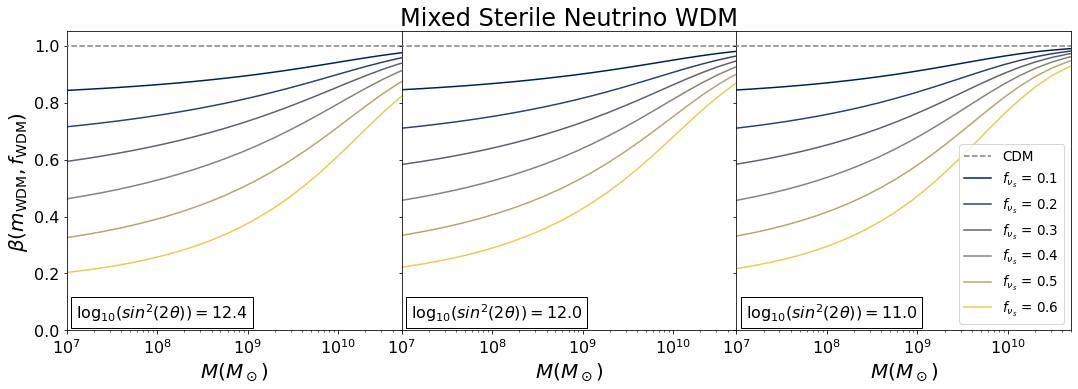

In [6]:
bob_info = sterile_nu.loc[sterile_nu["mixing"] == 12.398]

fig, (ax1, ax2, ax3 ) = plt.subplots(1, 3, figsize=(18, 5.5), sharey=True)

plot_maker_sterile_nu(ax1, 12.398)
plot_maker_sterile_nu(ax2, 12.)
plot_maker_sterile_nu(ax3, 11.,legend=True)
ax1.set_ylabel(r"$\beta(m_{\rm WDM},f_{\rm WDM})$",fontsize=20)
plt.subplots_adjust(wspace=0, hspace=0)
ax1.tick_params(labelsize=16)
ax2.tick_params(labelsize=16)
ax3.tick_params(labelsize=16)
ax2.set_title('Mixed Sterile Neutrino WDM', fontsize =24)